# Supervised Learning - Foundations: ReCell 

***Marks: 60***

## Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
## Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
## Data Description
The data contains the different attributes of used/refurbished phones and tablets. The detailed data dictionary is given below.

**Data Dictionary**

- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- new_price: Price of a new device of the same model in euros
- used_price: Price of the used/refurbished device in euros

### **Please read the instructions carefully before starting the project.** 
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned. 
* Blanks '_______' are provided in the notebook that 
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space. 
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.


### Let us start by importing necessary libraries and data

In [ ]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

<IPython.core.display.Javascript object>

In [ ]:
# loading data
data = pd.read_csv('_______') ##  Fill the blank to read the data

In [ ]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

In [ ]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

In [ ]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [ ]:
# checking the column names and datatypes
df.info()

In [ ]:
# checking for duplicate values
df.'_______' ##  Complete the code to check dulipcate entries in the data

In [ ]:
# checking for missing values in the data
df.'_______' ##  Complete the code to check the missing values in the data

## Exploratory Data Analysis

**Let's check the statistical summary of the data.**

In [ ]:
df.'_______' ##  Complete the code to print the statistical summary of the data

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

**`used_price`**

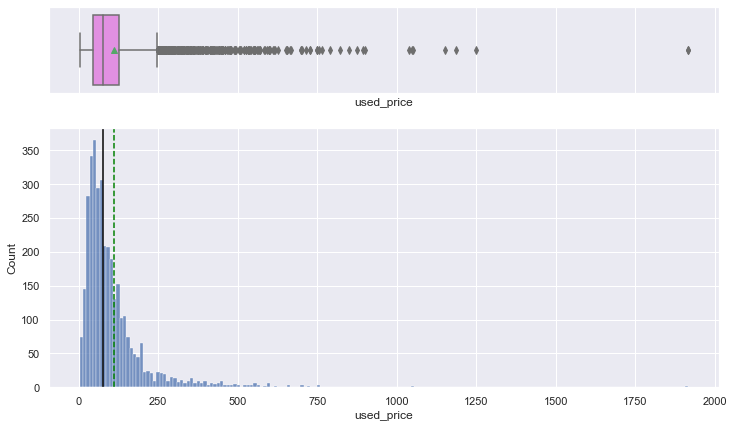

<IPython.core.display.Javascript object>

In [ ]:
histogram_boxplot(df, "used_price")

In [ ]:
df["used_price_log"] = np.log(df["used_price"])

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'used_price_log'

**`new_price`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'new_price'

In [ ]:
# let's apply the log transform to see if we can make the distribution of new_price closer to normal
df["new_price_log"] = np.log(df["new_price"])

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'new_price_log'

**`screen_size`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'screen_size'

**`main_camera_mp`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'main_camera_mp'

**`selfie_camera_mp`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'selfie_camera_mp'

**`int_memory`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'int_memory'

**`ram`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'ram'

**`weight`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'weight'

**`battery`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'battery'

**`days_used`**

In [ ]:
histogram_boxplot('_______')  ## Complete the code to create histogram_boxplot for 'days_used'

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**`brand_name`**

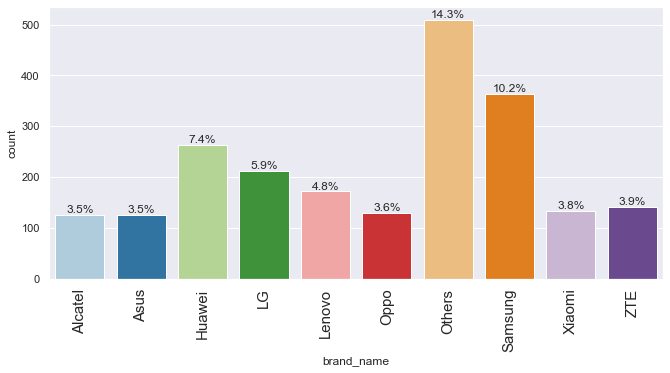

<IPython.core.display.Javascript object>

In [ ]:
labeled_barplot(df, "brand_name", perc=True, n=10)

**`os`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'os'

**`4g`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for '4g'

**`5g`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for '5g'

**`release_year`**

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'release_year'

### Bivariate Analysis

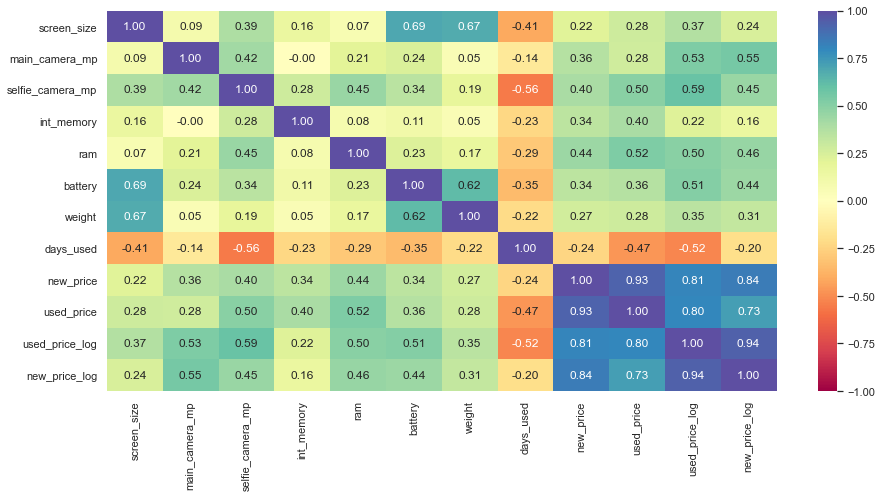

<IPython.core.display.Javascript object>

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

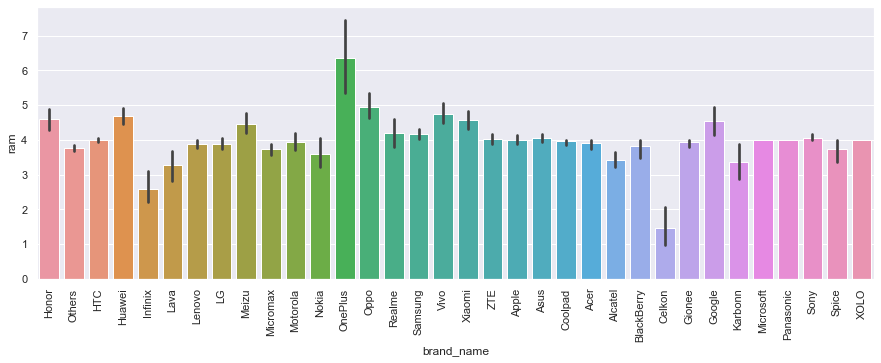

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases a device's weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

In [ ]:
df_large_battery.groupby("brand_name")["weight"].mean().sort_values(ascending=True)

In [ ]:
plt.figure(figsize=(15, 5))
sns.barplot('_______') ## Complete the code to create barplot for 'brand_name' and 'weight'
plt.xticks(rotation=60)
plt.show()

**People who buy devices primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [ ]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

In [ ]:
df_large_screen.brand_name.value_counts()

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'brand_name' in large screen dataframe

## Data Preprocessing

### Feature Engineering

- Let's create a new column `device_category` from the `new_price` column to tag devices as budget, mid-ranger, or premium.

In [ ]:
df["device_category"] = pd.cut(
    x=df.new_price,
    bins=[-np.infty, 200, 350, np.infty],
    labels=["Budget", "Mid-ranger", "Premium"],
)

df["device_category"].value_counts()

In [ ]:
labeled_barplot('_______') ## Complete the code to create labeled_barplot for 'device_category'

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [ ]:
df_selfie_camera = df['_______'] ## Complete the code to create a dataframe having selfie_camera_mp > 8
df_selfie_camera.shape

In [ ]:
plt.figure(figsize=(15, 5))
sns.countplot('_______') ## Complete the code to create countplot for 'brandname' with hue = 'device_category' on df_selfie_camera
plt.xticks(rotation=60)
plt.legend(loc=1)
plt.show()

**Let's do a similar analysis for rear cameras.**

In [ ]:
df_main_camera = df['_______'] ## Complete the code to create a dataframe having main_camera_mp > 16
df_main_camera.shape

In [ ]:
sns.countplot('_______') ## Complete the code to create countplot for 'brand_name' with hue = 'device_category' on df_main_camera

**Let's see how the price of used devices varies across the years.**

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot('_______') ## Complete the code tp create barplot for release year and used price
plt.show()

**Let's check the distribution of 4G and 5G devices wrt price segments.**

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
sns.heatmap(
    pd.crosstab(df["4g"], df["device_category"], normalize="columns"),
    annot=True,
    fmt=".4f",
    cmap="Spectral",
)

plt.subplot(122)
sns.heatmap( '_______' ) ## Complete the code to create crosstab for 5g

plt.show()

## Data Preprocessing

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.'_______' ## Complete the code to check missing values in all the columns

In [ ]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby('_______')[col].transform(
        lambda x: x.fillna(x.median())
    )   ## Complete the code to impute missing values in cols_impute with median by grouping the data on release year and brand name 

- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [ ]:
cols_impute = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1.groupby('_______') ## Complete the code to impute the missing values in cols_impute with median by grouping the data on brand name

- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [ ]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].'_______') ## Complete the code to impute the data with median

# checking for missing values
df1.'_______' ## Complete the code to check missing values after imputing the above columns

### Outlier Check

- Let's check for outliers in the data.

In [ ]:
# outlier detection using boxplot
numeric_columns = df1.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
numeric_columns.remove("release_year")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    '_______' ## Complete the code to create boxplots for all the columns
plt.show()

### Data Preparation for modeling

- We want to predict the used device price, so we will use the normalized version `used_price_log` for modeling.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# defining the dependent and independent variables
X = df1.'_______' ## Complete the code to drop "new_price", "used_price", "used_price_log", "device_category" from the data
y = df1["used_price_log"]

print(X.head())
print()
print(y.head())

In [ ]:
# creating dummy variables
X = pd.'_______'(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)  ## Complete the function to create dummies for independent features

X.head()

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = '_______' ## Complete the code to split the data into train and test in specified ratio

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

## Linear Regression using statsmodels

- Let's build a linear regression model using statsmodels.

In [ ]:
# adding constant to the train data
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.'_______' ## Complete the code to add contant to the test data

olsmodel1 = sm.'_______' ## Complete the code to fit OLS model
print(olsmodel1.summary())

**Let's check the model performance.**

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE and MAE.
* We will define a function to calculate MAPE.

In [ ]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"RMSE": rmse, "MAE": mae, "MAPE": mape,}, index=[0],)

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression('_______') ## Complete the code to check the performance on train data
olsmodel1_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression('_______') ## Complete the code to check the performance on test data
olsmodel1_test_perf

**Observations**


## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.



In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif('_______')  ## Complete the code to check VIF on train data

### Dropping high p-value variables

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
cols = '_____'.columns.tolist()   ## Complete the code to check for p-values on the right dataset

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = '_____'[cols]   ## Complete the code to check for p-values on the right dataset

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

In [ ]:
olsmodel2 = sm.'_______' ## Complete the code fit OLS() on y_train and x_train2
print(olsmodel2.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel2_test_perf

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.


In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = '_______' ## Complete the code to store the actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2..resid  # residuals

df_pred.head()

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.


In [ ]:
sns.histplot(data=df_pred, '_______') ## Complete the code to test the normality
plt.title("Normality of residuals")
plt.show()

In [ ]:
import pylab
import scipy.stats as stats

stats.'_______'  ## Complete the code check Q-Q plot
plt.show()

In [ ]:
stats.shapiro('_______') ## Complete the code to check p-value

### TEST FOR HOMOSCEDASTICITY

- We will test for homoscedasticity by using the goldfeldquandt test.


In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.'_______' ## Complete the code to check homoscedasticity
lzip(name, test)

## Final Model Summary

In [ ]:
olsmodel_final = sm.'_______' ## Complete the code to fit the final model
print(olsmodel_final.summary())

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression('_______') ## Complete the code to check the performance on train data
olsmodel_final_train_perf

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression('_______') ## Complete the code to check performance on test data
olsmodel_final_test_perf

##  Actionable Insights and Recommendations

- 